<a href="https://colab.research.google.com/github/srilaadebnath/ML_LAB_CODES/blob/main/question4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.optimize import curve_fit

In [ ]:
data = pd.read_csv("china_gdp.csv")
print("Dataset loaded successfully!")
print("Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())


Dataset loaded successfully!
Shape: (55, 2)

First 5 rows:
   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10


In [ ]:
X = data["Year"].values
y = data["Value"].values
def logistic_function(x, a, b, c):
    """a: max GDP, b: growth rate, c: midpoint (year where growth slows)"""
    return a / (1 + np.exp(-b * (x - c)))

In [ ]:
initial_guess = [max(y), 0.03, 1990]
params, _ = curve_fit(logistic_function, X, y, p0=initial_guess)
a, b, c = params
print(f"\nFitted Parameters: a={a:.2f}, b={b:.4f}, c={c:.2f}")


Fitted Parameters: a=49990201760758.93, b=0.1752, c=2021.37


In [ ]:
y_pred = logistic_function(X, a, b, c)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Model Performance:
R² Score: 0.9938
MAE: 163272913209.67
RMSE: 195234798044.26


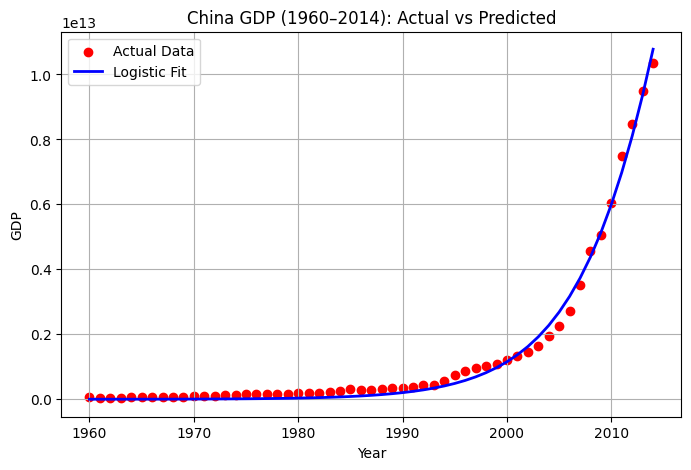

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Logistic Fit')
plt.title("China GDP (1960–2014): Actual vs Predicted")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.show()

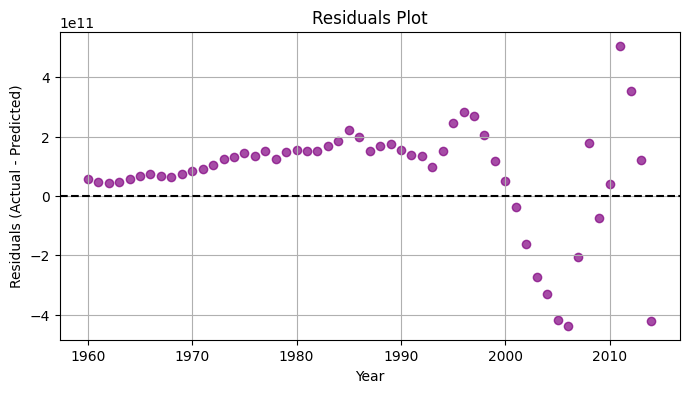

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X, y - y_pred, color='purple', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Year")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()